## FXR1 chr 3:180585929-180700541
### Ensemble ID: ENSG00000114416.13

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
FILE_ROOT = '/storage/dana/spliceSTR/expression/'

In [3]:
gene = 'ENSG00000114416.13'

---
# Percent Spliced In (PSI) calculations
---

In [3]:
exon_df = pd.read_table(FILE_ROOT + 'GTEx_Data_20150112_RNAseq_RNASeQCv1.1.8_exon_reads.lung.txt',index_col=0)
exon_df

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0626-SM-5N9CS,GTEX-14DAR-0226-SM-5S2PR,GTEX-139T6-0426-SM-5IJEM,GTEX-111CU-0326-SM-5GZXO,GTEX-YFC4-1126-SM-5RQJN,GTEX-TML8-0326-SM-4GICN,GTEX-111FC-1126-SM-5GZWU,GTEX-14E7W-1326-SM-5RQIV,...,GTEX-T5JC-0826-SM-32PMC,GTEX-YEC3-0226-SM-5IFJO,GTEX-1399S-1726-SM-5L3DI,GTEX-YEC4-0526-SM-4W21U,GTEX-T6MN-0826-SM-32PM4,GTEX-1399U-0826-SM-5KM1P,GTEX-T6MO-0426-SM-32QOI,GTEX-YECK-0926-SM-4W214,GTEX-T8EM-0326-SM-3DB7F,GTEX-YF7O-0626-SM-4W21R
Id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.10_0,1106.46,156.21,1344.38,311.13,714.91,615.25,447.13,572.84,685.09,416.03,...,334.25,545.45,546.72,1526.91,376.76,1320.45,545.68,1341.22,1290.25,714.58
ENSG00000000003.10_1,163.18,26.85,181.70,51.46,99.61,82.91,66.91,71.76,89.20,65.61,...,59.63,65.83,88.91,207.00,71.99,171.38,82.34,157.10,213.82,91.29
ENSG00000000003.10_2,97.53,18.54,123.89,31.09,66.18,57.99,33.60,56.68,82.93,29.96,...,32.20,49.58,47.65,155.18,34.62,118.91,56.85,93.80,128.38,65.42
ENSG00000000003.10_3,167.22,35.20,228.74,52.74,101.53,114.87,81.32,92.80,118.80,59.82,...,36.87,100.39,107.04,198.51,49.99,177.15,70.01,162.97,239.04,100.30
ENSG00000000003.10_4,121.17,22.08,162.87,37.30,89.53,82.84,56.10,55.20,88.93,44.68,...,33.87,71.11,66.92,139.74,41.53,119.59,67.30,119.42,156.12,86.70
ENSG00000000003.10_5,100.76,21.46,112.96,35.37,59.58,52.51,46.30,41.49,66.59,39.10,...,26.46,42.95,45.35,92.67,29.99,94.55,51.08,82.61,109.64,53.10
ENSG00000000003.10_6,176.34,33.41,230.78,45.67,120.24,93.99,85.12,92.11,85.01,59.80,...,47.43,82.95,86.24,138.91,54.35,163.04,85.29,128.90,214.40,112.92
ENSG00000000003.10_7,206.33,44.25,220.68,49.24,154.43,100.64,63.51,90.12,83.43,51.00,...,32.29,128.75,118.17,147.79,63.78,185.62,72.43,178.97,148.35,115.68
ENSG00000000003.10_8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [5]:
gene_df = exon_df.loc[exon_df.index.str.startswith(gene)]
exons = list(gene_df.index)
exons.sort()
gene_df

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0626-SM-5N9CS,GTEX-14DAR-0226-SM-5S2PR,GTEX-139T6-0426-SM-5IJEM,GTEX-111CU-0326-SM-5GZXO,GTEX-YFC4-1126-SM-5RQJN,GTEX-TML8-0326-SM-4GICN,GTEX-111FC-1126-SM-5GZWU,GTEX-14E7W-1326-SM-5RQIV,...,GTEX-T5JC-0826-SM-32PMC,GTEX-YEC3-0226-SM-5IFJO,GTEX-1399S-1726-SM-5L3DI,GTEX-YEC4-0526-SM-4W21U,GTEX-T6MN-0826-SM-32PM4,GTEX-1399U-0826-SM-5KM1P,GTEX-T6MO-0426-SM-32QOI,GTEX-YECK-0926-SM-4W214,GTEX-T8EM-0326-SM-3DB7F,GTEX-YF7O-0626-SM-4W21R
Id,,,,,,,,,,,,,,,,,,,,,
ENSG00000114416.13_0,0.00,1.00,0.08,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
ENSG00000114416.13_1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000114416.13_10,139.91,560.83,117.38,64.49,151.47,74.45,167.46,135.90,122.00,60.96,...,96.43,161.92,98.97,94.12,78.64,116.57,137.99,54.21,346.28,93.05
ENSG00000114416.13_11,208.97,782.69,142.96,130.32,210.62,146.15,272.37,218.15,163.57,82.38,...,149.26,202.85,158.49,146.47,115.18,168.32,189.42,94.80,495.13,160.79
ENSG00000114416.13_12,319.33,1560.38,306.21,215.88,406.93,231.72,471.46,339.82,315.75,141.63,...,262.59,389.55,308.29,269.53,223.58,307.08,262.51,219.18,827.07,332.64
ENSG00000114416.13_13,115.25,616.03,130.72,99.70,172.42,96.88,197.01,137.10,112.25,67.37,...,109.49,142.50,107.12,125.28,82.84,132.15,121.38,93.61,332.32,118.92
ENSG00000114416.13_14,210.63,1038.50,205.68,167.22,272.72,156.38,388.21,224.30,234.96,123.82,...,173.79,240.17,176.24,202.93,172.66,243.22,179.97,152.95,518.42,180.35
ENSG00000114416.13_15,175.24,882.79,165.72,159.45,234.99,111.46,327.76,179.60,246.51,94.89,...,154.10,209.42,170.80,196.05,134.79,212.71,112.45,136.43,364.68,195.15
ENSG00000114416.13_16,51.97,268.34,58.62,59.49,69.18,35.79,111.45,59.67,83.09,30.24,...,60.37,51.28,55.10,67.64,50.84,72.79,40.74,51.12,127.53,69.17


In [6]:
junction_df = pd.read_table(FILE_ROOT + 'GTEx_Data_20150112_RNAseq_Flux1.6_junction_reads.lung.txt',
                              index_col=0,
                              sep='\t',
                              skipinitialspace=True)

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
gene_junction_df = junction_df[junction_df['Gene_Symbol'] == gene]
gene_junction_df

,Gene_Symbol,Chr,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-0326-SM-5GZXO,GTEX-111FC-1126-SM-5GZWU,GTEX-111VG-0726-SM-5GIDC,GTEX-111YS-0626-SM-5GZXV,GTEX-1122O-0126-SM-5GICA,GTEX-1128S-0726-SM-5N9D6,GTEX-117YW-0526-SM-5H11C,...,GTEX-ZXG5-0826-SM-5GID6,GTEX-ZY6K-0326-SM-5SIBB,GTEX-ZYFG-0226-SM-5GIDT,GTEX-ZYT6-0526-SM-5GIEA,GTEX-ZYVF-1726-SM-5E443,GTEX-ZYW4-1526-SM-5SIBA,GTEX-ZYWO-0826-SM-5E45W,GTEX-ZYY3-0926-SM-5E454,GTEX-ZZPT-1326-SM-5E43H,GTEX-ZZPU-0526-SM-5E44U
TargetID,,,,,,,,,,,,,,,,,,,,,
3_180586083_180651122,ENSG00000114416.13,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3_180586083_180665653,ENSG00000114416.13,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3_180586624_180651122,ENSG00000114416.13,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3_180630524_180632440,ENSG00000114416.13,3,5.0,2.0,9.0,0.0,0.0,3.0,3.0,1.0,...,7.0,0.0,4.0,4.0,1.0,6.0,2.0,4.0,11.0,2.0
3_180630524_180645436,ENSG00000114416.13,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3_180630524_180651122,ENSG00000114416.13,3,91.0,62.0,47.0,64.0,72.0,41.0,59.0,36.0,...,81.0,40.0,50.0,51.0,41.0,50.0,71.0,66.0,59.0,71.0
3_180630524_180652926,ENSG00000114416.13,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3_180630524_180665653,ENSG00000114416.13,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0
3_180632783_180651122,ENSG00000114416.13,3,0.0,3.0,0.0,2.0,4.0,2.0,6.0,0.0,...,2.0,1.0,0.0,0.0,2.0,2.0,0.0,4.0,1.0,0.0


In [8]:
annotations = pd.read_csv('/storage/dana/spliceSTR/expression/gencode.v19.annotations_exons.csv',index_col=0)
gene_annotations = annotations[annotations['gene.id'] == gene].sort_values(by='probe.start')

In [9]:
gene_annotations.index = gene_annotations['probe.id']
gene_annotations

,gene.chr,gene.start,gene.stop,gene.id,gene.strand,probe.chr,probe.start,probe.stop,probe.id,probe.strand
probe.id,,,,,,,,,,
ENSG00000114416.13_0,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180585929,180586083,ENSG00000114416.13_0,+
ENSG00000114416.13_1,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180586539,180586624,ENSG00000114416.13_1,+
ENSG00000114416.13_2,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180630090,180630524,ENSG00000114416.13_2,+
ENSG00000114416.13_3,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180632440,180632783,ENSG00000114416.13_3,+
ENSG00000114416.13_4,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180633222,180633419,ENSG00000114416.13_4,+
ENSG00000114416.13_5,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180645436,180645601,ENSG00000114416.13_5,+
ENSG00000114416.13_6,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180651122,180651174,ENSG00000114416.13_6,+
ENSG00000114416.13_7,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180652926,180653019,ENSG00000114416.13_7,+
ENSG00000114416.13_8,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180665653,180665724,ENSG00000114416.13_8,+


In [16]:
read_len = 75*2

#sample_names = ["-".join(i.split('-')[:2]) for i in PSI_df_filtered.index]
#PSI_df_filtered.index = new_index
PSI_df = pd.DataFrame(index = exon_df.columns, columns = exons)
coverage_df = pd.DataFrame(index = exon_df.columns, columns = exons)
exon_too_few_reads = []
min_reads = 10

for exon in exons:
    print()
    exon_chrom = gene_annotations.loc[exon]['probe.chr'].split('chr')[1]
    exon_start = gene_annotations.loc[exon]['probe.start']
    exon_stop = gene_annotations.loc[exon]['probe.stop']
    exon_len = math.fabs(exon_start - exon_stop) + 1
    print('EXON: {}'.format(exon))
    print('START: {}'.format(exon_start))
    print('STOP : {}'.format(exon_stop))
    print('length : {}'.format(exon_len))
    print()
    B_intervals = []
    C_intervals = []
    for interval in gene_junction_df.index:
        chrom,start,stop = interval.split('_')
        if chrom != exon_chrom:
            print(chrom)
            print(exon_chrom)
            print('Chromosomes aren\'t matching, something is wrong!!')
        # C
        if int(start) < exon_start and int(stop) > exon_stop: # check on strand orientation
            print('C')
            print(interval)
            C_intervals.append(interval)
        #B1
        if int(start) < exon_start and (int(stop) >= exon_start and int(stop) <= exon_stop):
            print('B1')
            print(interval)
            B_intervals.append(interval)
        #B2
        if (int(start) >= exon_start and int(start) <= exon_stop) and int(stop) > exon_stop:
            print('B2')
            print(interval)
            B_intervals.append(interval)
        
    A_reads = exon_df.loc[exon]

    B_reads = gene_junction_df.loc[B_intervals]
    B_reads = B_reads.iloc[:,2:].sum()

    C_reads = gene_junction_df.loc[C_intervals]
    C_reads = C_reads.iloc[:,2:].sum()

    total_reads = A_reads + B_reads + C_reads 
    samples_low_reads = len(total_reads[total_reads < min_reads])
    if samples_low_reads/len(total_reads) > 0.2:
        exon_too_few_reads.append(exon)
    coverage_df[exon] = total_reads

    
#     if exon == 'ENSG00000114416.13_0':
#         print('A reads: {}'.format(A_reads))
#         print('B reads: {}'.format(B_reads))
#         print('C reads: {}'.format(C_reads))
    A_B_norm = (A_reads + B_reads)/(read_len+exon_len-1)
    C_norm = C_reads/(read_len-1)

    mask = (A_B_norm == 0) & (C_norm == 0)
    PSI_norm = 100*((A_B_norm)/(A_B_norm + C_norm)) if (A_B_norm.sum() + C_norm.sum()) > 0.00 else 0
    PSI_norm = PSI_norm.where(~mask,0)
    PSI_df[exon] = PSI_norm



EXON: ENSG00000114416.13_0
START: 180585929
STOP : 180586083
length : 155.0

B2
3_180586083_180651122
B2
3_180586083_180665653

EXON: ENSG00000114416.13_1
START: 180586539
STOP : 180586624
length : 86.0

C
3_180586083_180651122
C
3_180586083_180665653
B2
3_180586624_180651122

EXON: ENSG00000114416.13_10
START: 180666509
STOP : 180666602
length : 94.0

C
3_180665724_180667015
B1
3_180666283_180666509
B2
3_180666602_180667015

EXON: ENSG00000114416.13_11
START: 180667015
STOP : 180667131
length : 117.0

B1
3_180665724_180667015
B1
3_180666602_180667015
B2
3_180667131_180669086

EXON: ENSG00000114416.13_12
START: 180669086
STOP : 180669256
length : 171.0

B1
3_180667131_180669086
B2
3_180669256_180671550

EXON: ENSG00000114416.13_13
START: 180671550
STOP : 180671628
length : 79.0

B1
3_180669256_180671550
B2
3_180671628_180675607

EXON: ENSG00000114416.13_14
START: 180675607
STOP : 180675716
length : 110.0

B1
3_180671628_180675607
B2
3_180675716_180679256

EXON: ENSG00000114416.13_15
S

In [62]:
PSI_df

,ENSG00000114416.13_0,ENSG00000114416.13_1,ENSG00000114416.13_10,ENSG00000114416.13_11,ENSG00000114416.13_12,ENSG00000114416.13_13,ENSG00000114416.13_14,ENSG00000114416.13_15,ENSG00000114416.13_16,ENSG00000114416.13_17,...,ENSG00000114416.13_20,ENSG00000114416.13_21,ENSG00000114416.13_22,ENSG00000114416.13_3,ENSG00000114416.13_4,ENSG00000114416.13_5,ENSG00000114416.13_6,ENSG00000114416.13_7,ENSG00000114416.13_8,ENSG00000114416.13_9
GTEX-1117F-0226-SM-5GZZ7,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,7.878323,46.098996,100.0,6.339784,0.000000,0.000000,99.858709,99.780422,100.0,100.0
GTEX-1117F-0426-SM-5EGHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0626-SM-5N9CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-14DAR-0226-SM-5S2PR,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,16.542474,70.369164,100.0,17.318267,0.000000,0.000000,100.000000,100.000000,100.0,100.0
GTEX-139T6-0426-SM-5IJEM,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,22.972224,71.186901,100.0,4.577520,0.000000,0.000000,99.760087,99.633310,100.0,100.0
GTEX-111CU-0326-SM-5GZXO,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,11.119206,70.205882,100.0,14.975111,0.000000,0.000000,100.000000,100.000000,100.0,100.0
GTEX-YFC4-1126-SM-5RQJN,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,11.634757,65.785552,100.0,39.666404,0.000000,0.000000,99.882937,99.504013,100.0,100.0
GTEX-TML8-0326-SM-4GICN,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,12.950549,80.598876,100.0,17.894282,0.000000,0.000000,99.448656,99.560408,100.0,100.0
GTEX-111FC-1126-SM-5GZWU,100.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,17.665380,64.635473,100.0,49.732082,1.561524,1.858736,99.739244,98.539802,100.0,100.0
GTEX-14E7W-1326-SM-5RQIV,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,29.192215,52.404775,100.0,23.859461,0.000000,0.000000,100.000000,100.000000,100.0,100.0


(array([ 3., 42., 68., 85., 79., 39., 25., 12.,  7.,  2.]),
 array([ 0.        ,  4.53042357,  9.06084714, 13.59127071, 18.12169428,
        22.65211785, 27.18254142, 31.71296499, 36.24338855, 40.77381212,
        45.30423569]),
 <a list of 10 Patch objects>)

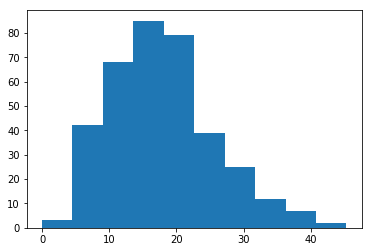

In [15]:
plt.hist(PSI_df['ENSG00000114416.13_20'].dropna())

(array([10., 77., 91., 88., 49., 20., 16.,  7.,  2.,  2.]),
 array([ 0.        ,  2.2366436 ,  4.47328721,  6.70993081,  8.94657442,
        11.18321802, 13.41986163, 15.65650523, 17.89314884, 20.12979244,
        22.36643605]),
 <a list of 10 Patch objects>)

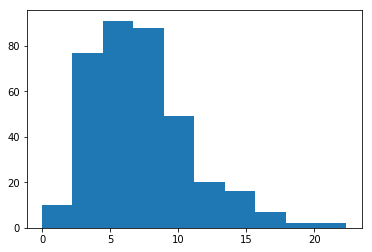

In [17]:
plt.hist(PSI_df['ENSG00000114416.13_20'].dropna())

## From duplicated samples, keeping highest coverage

In [18]:
#Getting median coverage
med_coverage_df = pd.DataFrame(coverage_df.median(axis=1))
#Abbreviated sample names
med_coverage_df['samples'] = ["-".join(i.split('-')[:2]) for i in coverage_df.index]
med_coverage_df['original_samples'] = med_coverage_df.index
#Take the maximum coverage sample
med_coverage_df.groupby('samples').max()
highest_cov_samples = list(med_coverage_df.groupby('samples').max()['original_samples'])
highest_cov_samples

['GTEX-1117F-0626-SM-5N9CS',
 'GTEX-111CU-0326-SM-5GZXO',
 'GTEX-111FC-1126-SM-5GZWU',
 'GTEX-111VG-0726-SM-5GIDC',
 'GTEX-111YS-0626-SM-5GZXV',
 'GTEX-1122O-0126-SM-5GICA',
 'GTEX-1128S-0726-SM-5N9D6',
 'GTEX-117YW-0526-SM-5H11C',
 'GTEX-117YX-1326-SM-5H125',
 'GTEX-11DXX-0626-SM-5Q5AG',
 'GTEX-11DXZ-0726-SM-5N9C4',
 'GTEX-11DZ1-0426-SM-5H11A',
 'GTEX-11EI6-0826-SM-5985V',
 'GTEX-11EMC-0126-SM-5EGKV',
 'GTEX-11EQ9-0226-SM-5A5JX',
 'GTEX-11GSP-0726-SM-5986L',
 'GTEX-11I78-0126-SM-5HL6F',
 'GTEX-11ILO-0726-SM-5HL5I',
 'GTEX-11LCK-0426-SM-5A5M8',
 'GTEX-11NSD-0326-SM-5A5LS',
 'GTEX-11NUK-0826-SM-5HL4U',
 'GTEX-11NV4-1126-SM-5HL6J',
 'GTEX-11O72-1326-SM-5BC5A',
 'GTEX-11OF3-1126-SM-5986C',
 'GTEX-11P7K-0326-SM-59871',
 'GTEX-11P81-0226-SM-5HL5M',
 'GTEX-11PRG-0926-SM-5EGI8',
 'GTEX-11TT1-1626-SM-5EQL7',
 'GTEX-11TUW-0526-SM-5LU9A',
 'GTEX-11UD2-0726-SM-5EQ69',
 'GTEX-11WQC-0626-SM-5EQMF',
 'GTEX-11WQK-1226-SM-5GU5Z',
 'GTEX-11ZTS-1226-SM-5EQMQ',
 'GTEX-11ZTT-0626-SM-5EQLM',
 'GTEX-11ZUS-0

In [19]:
PSI_df = PSI_df.dropna().loc[highest_cov_samples]
exons_to_remove = exon_too_few_reads
num_samples = len(PSI_df.index)
for exon in exons:
    exon_PSI = PSI_df[exon]
    num_zero = len(exon_PSI[exon_PSI == 0])
    num_hundred = len(exon_PSI[exon_PSI == 100])
    if num_zero/num_samples > 0.9 or num_hundred/num_samples > 0.9:
        exons_to_remove.append(exon)
exons_to_remove

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


['ENSG00000114416.13_0',
 'ENSG00000114416.13_1',
 'ENSG00000114416.13_1',
 'ENSG00000114416.13_10',
 'ENSG00000114416.13_11',
 'ENSG00000114416.13_12',
 'ENSG00000114416.13_13',
 'ENSG00000114416.13_14',
 'ENSG00000114416.13_15',
 'ENSG00000114416.13_16',
 'ENSG00000114416.13_17',
 'ENSG00000114416.13_18',
 'ENSG00000114416.13_19',
 'ENSG00000114416.13_2',
 'ENSG00000114416.13_22',
 'ENSG00000114416.13_8',
 'ENSG00000114416.13_9']

In [20]:
PSI_df_filtered = PSI_df.drop(exons_to_remove,axis=1).dropna()
new_index = ["-".join(i.split('-')[:2]) for i in PSI_df_filtered.index]
PSI_df_filtered.index = new_index
PSI_df_filtered

,ENSG00000114416.13_20,ENSG00000114416.13_21,ENSG00000114416.13_3,ENSG00000114416.13_4,ENSG00000114416.13_5,ENSG00000114416.13_6,ENSG00000114416.13_7
GTEX-111CU,4.143292,46.916286,10.851288,0.000000,0.000000,100.000000,100.000000
GTEX-111FC,6.901453,40.671257,40.608238,0.886641,0.975833,98.987946,96.248356
GTEX-111VG,16.682899,47.664848,16.881348,0.000000,0.000000,99.139758,99.107891
GTEX-111YS,6.727000,42.039313,6.001463,0.000000,0.000000,100.000000,100.000000
GTEX-1122O,5.513079,47.727548,12.753419,0.988719,0.000000,100.000000,100.000000
GTEX-1128S,2.546365,48.234151,12.434131,0.000000,0.000000,100.000000,100.000000
GTEX-117YW,5.859417,42.726540,15.362304,0.000000,0.000000,100.000000,100.000000
GTEX-117YX,3.196765,51.523032,8.786373,0.000000,0.517110,100.000000,100.000000
GTEX-11DXX,9.026933,52.230332,19.719883,0.000000,0.000000,100.000000,100.000000
GTEX-11DXZ,5.421122,46.902492,3.149583,0.000000,0.000000,100.000000,100.000000


In [21]:
PSI_df_filtered.to_csv('FXR1_PSI.csv')

## Spot checking regression here:

In [22]:
expr = pd.read_csv('FXR1_PSI.csv',index_col=0)
strgt = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/SNP_Analysis/chr3.tab', sep="\t", low_memory=False)
expr_annot = pd.read_csv('/storage/dana/spliceSTR/expression/gencode.v19.annotations_exons.csv')
expr_annot.index = expr_annot["probe.id"].values
expr_annot = expr_annot.loc[[item for item in expr.columns if item in expr_annot.index],:]
gene = 'ENSG00000114416.13_20'

In [23]:
expr_annot

,Unnamed: 0,gene.chr,gene.start,gene.stop,gene.id,gene.strand,probe.chr,probe.start,probe.stop,probe.id,probe.strand
ENSG00000114416.13_20,53435,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180688863,180688943,ENSG00000114416.13_20,+
ENSG00000114416.13_21,53436,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180693101,180693192,ENSG00000114416.13_21,+
ENSG00000114416.13_3,53418,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180632440,180632783,ENSG00000114416.13_3,+
ENSG00000114416.13_4,53419,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180633222,180633419,ENSG00000114416.13_4,+
ENSG00000114416.13_5,53420,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180645436,180645601,ENSG00000114416.13_5,+
ENSG00000114416.13_6,53421,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180651122,180651174,ENSG00000114416.13_6,+
ENSG00000114416.13_7,53422,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180652926,180653019,ENSG00000114416.13_7,+


In [24]:
STR = 180633485
str_samples = list(set(strgt.columns[2:].values))
samples_to_remove = []
for item in str_samples:
    if item not in expr.index: samples_to_remove.append(item) #str_samples.remove(item)
for item in samples_to_remove: str_samples.remove(item)
expr = expr.loc[str_samples,:]
cis_strs = strgt[strgt['start'] == STR].dropna(axis=0)

for j in range(cis_strs.shape[0]):
    # cis STR data
    locus_str = cis_strs.iloc[[j],:][str_samples].transpose()
    locus_str.index = str_samples
    locus_str.columns = ["STR_%s"%(cis_strs["start"].values[j])]
    test_str=locus_str.columns[0]
    str_start = cis_strs["start"].values[j]
    
samples_to_keep = [str_samples[k] for k in range(len(str_samples)) if str(locus_str.iloc[:,0].values[k]) != "None" and  str(locus_str.iloc[:,0].values[k]) != 'NA,NA' and int(locus_str.iloc[:,0].values[k]) <2]

locus_str = locus_str.loc[samples_to_keep,:]

y = pd.DataFrame({"expr":list(expr.loc[:, gene])})
y.index = str_samples
locus_y = y.loc[samples_to_keep,:]
Locus_data = locus_str.join(locus_y)

In [30]:
locus_str

,STR_180633485
GTEX-Q734,0
GTEX-13VXU,0
GTEX-13OW8,0
GTEX-R55C,0
GTEX-SUCS,0
GTEX-132NY,1
GTEX-131XW,0
GTEX-P4PQ,0
GTEX-WYBS,1
GTEX-131XE,0


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


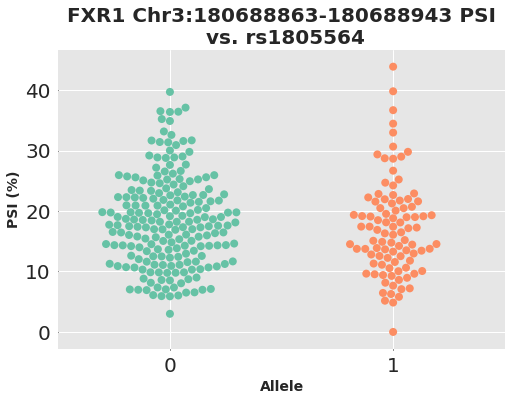

In [15]:
import seaborn as sns



flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_style('darkgrid',{"axes.facecolor": "0.9",
                          'axes.grid' : True,
                          'grid.linestyle': u'-',
                          'xtick.major.size': 1,
                          'ytick.major.size': 0.5,})

sns.swarmplot(locus_str['STR_180633485'].astype(int),locus_y["expr"],palette= sns.color_palette("Set2"),size=8)
plt.xlabel('Allele',fontsize=14,fontweight='bold')
plt.ylabel('PSI (%)',fontsize=14,fontweight='bold')
plt.title('FXR1 Chr3:180688863-180688943 PSI\n vs. {}'.format('rs1805564'),fontsize=20,fontweight='bold')
ax = plt.gca()
ax.grid(True)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


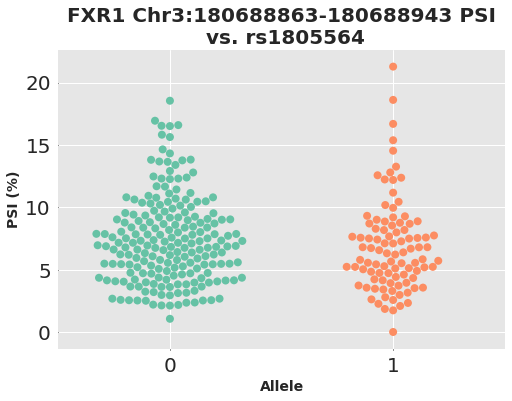

In [26]:
import seaborn as sns



flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_style('darkgrid',{"axes.facecolor": "0.9",
                          'axes.grid' : True,
                          'grid.linestyle': u'-',
                          'xtick.major.size': 1,
                          'ytick.major.size': 0.5,})

sns.swarmplot(locus_str['STR_180633485'].astype(int),locus_y["expr"],palette= sns.color_palette("Set2"),size=8)
plt.xlabel('Allele',fontsize=14,fontweight='bold')
plt.ylabel('PSI (%)',fontsize=14,fontweight='bold')
plt.title('FXR1 Chr3:180688863-180688943 PSI\n vs. {}'.format('rs1805564'),fontsize=20,fontweight='bold')
ax = plt.gca()
ax.grid(True)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
def ZNorm(vals,m,sd):
    if m is None:
        m = np.mean(vals)
        sd = math.sqrt(np.var(vals))
    if sd == 0: return None
    return [(item-m)/sd for item in vals]

def LinearRegression(data, Y, norm=False, minsamples=0, alleles=False):
    """
    Perform linear regression, return beta, beta_se, p
    """
    print(alleles, norm)
    if norm:
        if alleles:
            data['x1+x2'] = data['x1'].astype(float) + data['x2'].astype(float)
            X = ZNorm(data['x1+x2'], None, None)
        else:
            X = ZNorm(data,None, None) 
            Y = ZNorm(Y, None, None)
        if X is None or Y is None: return None, None, None
        if np.var(X)==0: return None, None, None
        if len(X) <= minsamples: return None, None, None
    else:
        X = np.array(data,dtype=int)
        print('Here!!!!!!')
    X = sm.add_constant(X)
    print('X: '.format(X))
    mod_ols = sm.OLS(Y, X, missing='drop')
    print(mod_ols)
    res_ols = mod_ols.fit()
    pval = res_ols.pvalues[1]
    print('P-value: ', pval) 
    slope = res_ols.params[1]
    err = res_ols.bse[1]
    return res_ols, slope, err, pval

In [29]:
res_ols, slope, err, pval = LinearRegression(locus_str, locus_y["expr"].values, norm=False, minsamples=0, alleles=False)

False False
Here!!!!!!
X: 
P-value:  0.20026111803476287


In [28]:
res_ols, slope, err, pval = LinearRegression(locus_str, locus_y["expr"].values, norm=False, minsamples=0, alleles=False)

False False
Here!!!!!!
X: 
P-value:  0.2439640783576455


In [29]:
slope

-0.5125227529843766

In [20]:
locus_y["expr"]

GTEX-ZVT3     15.972474
GTEX-1477Z    12.571898
GTEX-W5X1      0.000000
GTEX-P4QR     15.051765
GTEX-13OVL    29.793141
GTEX-147JS    16.085226
GTEX-13QJC    13.361627
GTEX-13VXU    14.368945
GTEX-ZT9W      7.359982
GTEX-11I78    15.085236
GTEX-ZZPT      7.112383
GTEX-13G51    36.395504
GTEX-QDVN     11.670531
GTEX-12WSN    19.368830
GTEX-ZYFG     11.272968
GTEX-RU72     18.223712
GTEX-XPVG     16.970059
GTEX-XQ3S     18.808975
GTEX-ZF28     20.130933
GTEX-OXRO     13.441955
GTEX-131XF    17.610711
GTEX-12WSG    29.000261
GTEX-S4Z8     19.759278
GTEX-11TUW    27.634094
GTEX-OHPM     23.346576
GTEX-PVOW     19.027202
GTEX-ZYW4     25.946496
GTEX-XXEK     17.486457
GTEX-ZYWO     24.388436
GTEX-WYJK     22.765670
                ...    
GTEX-13OW8    17.332081
GTEX-U3ZH     25.731799
GTEX-S32W     20.071935
GTEX-YFC4     11.634757
GTEX-148VJ     6.550218
GTEX-ZYT6     29.028718
GTEX-NFK9     19.799499
GTEX-139UW    21.764642
GTEX-ZAB4     13.593014
GTEX-OIZH     13.847022
GTEX-S7SF     22

In [19]:
locus_str

,STR_180633485
GTEX-ZVT3,0
GTEX-1477Z,1
GTEX-W5X1,1
GTEX-P4QR,0
GTEX-13OVL,0
GTEX-147JS,0
GTEX-13QJC,0
GTEX-13VXU,0
GTEX-ZT9W,0
GTEX-11I78,1
